In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline

In [4]:
def cross_validation(model, _X, _y, _cv=5):
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

Ovenover definere vi cross_validation, hvor vi tager vores model, data for træning og testning og antallet af cross validation som vi har sat til 5

vi opretter et array vi kalder for _scoring hvor vi har nogle evalueringsmålinger som vi bruger til se modellens ydeevne

Vores cross valdation er gemt i vores results dictionary

Nede i vores return statement retunere vi forskellige præcisioner udregninger 

In [11]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()


Her laver Plotter vi vores crossvalidations værdier

In [6]:
df = pd.read_csv("data/stackoverflow_full.csv")

age = {"<35": 0, ">35": 1}
df["Age"] = df["Age"].map(age)

edlevel = {"Master": 0, "PhD": 1, "Undergraduate": 2}
df["EdLevel"] = df["EdLevel"].map(edlevel)

Accs = {"Yes": 0, "No": 1}
df["Accessibility"] = df["Accessibility"].map(Accs)

mb = {"Dev": 0, "NotDev": 1}
df["MainBranch"] = df["MainBranch"].map(mb)

gender = {"Man": 0, "Female": 1, "NonBinary": 2}
df["Gender"] = df["Gender"].map(gender)

mh = {"Yes": 0, "No": 1}
df["MentalHealth"] = df["MentalHealth"].map(mh)

features = ["Age", "EdLevel", "YearsCode", "YearsCodePro", "ComputerSkills"]

X = df[features]
y = df["Employed"]

df


,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,0,1,0.0,1,0.0,1,0,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,0,1,2.0,1,0.0,1,0,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,0,1,0.0,1,0.0,1,0,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,0,1,2.0,1,0.0,1,0,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,1,1,1.0,0,0.0,1,1,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,73457,0,1,2.0,1,0.0,1,0,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,73458,1,1,2.0,1,0.0,1,0,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,73459,0,1,2.0,1,0.0,1,0,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,73460,0,0,2.0,1,0.0,0,0,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


Her gør vi vores data om til mere håndter bar data

For eksempel siger vi at male har værdien "0" og female er "1" og nonbinary "2" 

til sidst sætter vi features som x og employed  som y

In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_y = label_encoder.fit_transform(y)
label_encoder_name_mapping = dict(zip(label_encoder.classes_,
                                         label_encoder.transform(label_encoder.classes_)))
print("Mapping of Label Encoded Classes", label_encoder_name_mapping, sep="\n")
print("Label Encoded Target Variable", encoded_y, sep="\n")

Mapping of Label Encoded Classes
{0: 0, 1: 1}
Label Encoded Target Variable
[0 1 0 ... 1 1 0]


Koden label_encoder omdanner y eller "unemployed" til numeriske værdier som er "0" og "1"

Derefter printer vi dem ud for at check om den har gjort det rigtigt

In [8]:
print(f"y = {encoded_y}")

decision_tree_model = DecisionTreeClassifier(criterion="entropy",
                                     random_state=0)
decision_tree_result = cross_validation(decision_tree_model, X, encoded_y, 5)
print(decision_tree_result)

y = [0 1 0 ... 1 1 0]
{'Training Accuracy scores': array([0.78461434, 0.78677534, 0.78888889, 0.78295048, 0.78075549]), 'Mean Training Accuracy': 78.47969079111051, 'Training Precision scores': array([0.78614138, 0.79070693, 0.77656834, 0.78055639, 0.77724202]), 'Mean Training Precision': 0.7822430100812985, 'Training Recall scores': array([0.82191477, 0.81918573, 0.85120899, 0.82801295, 0.82861585]), 'Mean Training Recall': 0.8297876569175491, 'Training F1 scores': array([0.80363016, 0.80469444, 0.81217736, 0.80358463, 0.80210717]), 'Mean Training F1 Score': 0.8052387516695271, 'Validation Accuracy scores': array([0.78282175, 0.77424624, 0.77130411, 0.7894092 , 0.79818949]), 'Mean Validation Accuracy': 78.31941591615632, 'Validation Precision scores': array([0.7778568 , 0.76104372, 0.75364923, 0.80072919, 0.81546167]), 'Mean Validation Precision': 0.7817481212502752, 'Validation Recall scores': array([0.83284681, 0.84401574, 0.85199289, 0.80845392, 0.80604214]), 'Mean Validation Recal

Ovenover opretter vi vores decisiontree hvor vi også vudere vores cross validation præcision og printer det ud som "decision_tree_result" 

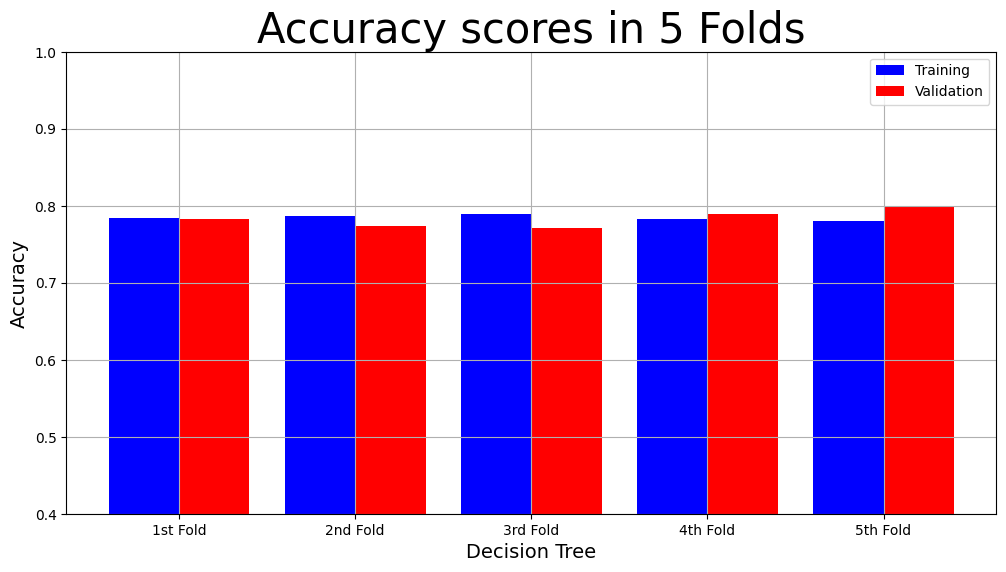

In [9]:
model_name = "Decision Tree"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 5 Folds",
            decision_tree_result["Training Accuracy scores"],
            decision_tree_result["Validation Accuracy scores"])

Her Plotter vi vores nøjagtighed